### import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Load data and store it into pandas DataFrame objects
df = pd.read_csv('./Datasets/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
y = df['species']
X = df.drop(['species'],axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz
target_names = np.unique(y)
# Creates dot file named tree.dot
# http://webgraphviz.com/
dotfile = open("tree.dot", 'w')
export_graphviz(
            tree,
            out_file =  dotfile,
            feature_names = list(X.columns),
            class_names = target_names,
            filled = True,
            rounded = True)
dotfile.close()

# from subprocess import call

# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

In [10]:
predicted = tree.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, predicted)

1.0

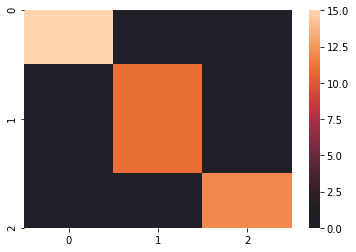

In [12]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [11]:
report = classification_report(y_test, predicted)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

